<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Setting-up" data-toc-modified-id="Setting-up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting up</a></span></li></ul></li><li><span><a href="#Levels-of-education" data-toc-modified-id="Levels-of-education-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Levels of education</a></span><ul class="toc-item"><li><span><a href="#Australia" data-toc-modified-id="Australia-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Australia</a></span></li><li><span><a href="#Germany" data-toc-modified-id="Germany-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Germany</a></span></li><li><span><a href="#Netherlands" data-toc-modified-id="Netherlands-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Netherlands</a></span></li><li><span><a href="#New-Zealand" data-toc-modified-id="New-Zealand-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>New Zealand</a></span></li><li><span><a href="#South-Africa" data-toc-modified-id="South-Africa-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>South Africa</a></span></li><li><span><a href="#United-Kingdom" data-toc-modified-id="United-Kingdom-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>United Kingdom</a></span></li><li><span><a href="#United-States" data-toc-modified-id="United-States-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>United States</a></span></li><li><span><a href="#Rest-of-the-World" data-toc-modified-id="Rest-of-the-World-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Rest of the World</a></span></li><li><span><a href="#Comparison-between-countries" data-toc-modified-id="Comparison-between-countries-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Comparison between countries</a></span></li></ul></li><li><span><a href="#Academic-field-for-education-and-professional-development" data-toc-modified-id="Academic-field-for-education-and-professional-development-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Academic field for education and professional development</a></span><ul class="toc-item"><li><span><a href="#Australia" data-toc-modified-id="Australia-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Australia</a></span></li><li><span><a href="#Germany" data-toc-modified-id="Germany-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Germany</a></span></li><li><span><a href="#Netherlands" data-toc-modified-id="Netherlands-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Netherlands</a></span></li><li><span><a href="#New-Zealand" data-toc-modified-id="New-Zealand-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New Zealand</a></span></li><li><span><a href="#South-Africa" data-toc-modified-id="South-Africa-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>South Africa</a></span></li><li><span><a href="#United-Kingdom" data-toc-modified-id="United-Kingdom-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>United Kingdom</a></span></li><li><span><a href="#United-States" data-toc-modified-id="United-States-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>United States</a></span></li><li><span><a href="#Rest-of-the-world" data-toc-modified-id="Rest-of-the-world-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Rest of the world</a></span></li><li><span><a href="#Comparison-between-countries" data-toc-modified-id="Comparison-between-countries-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Comparison between countries</a></span></li></ul></li></ul></div>

# Introduction

This section contains the information about the type of education the participants have, as well as their highest degree obtained. 
Three questions were asked:
* What is the highest level of education you have attained?
* In which discipline is your highest academic qualification?
* Which professional qualification do you hold?

The first two questions are `one choice` type (a list of predefined answers), while the question about the professional qualification is a `free text` (they are free to enter any short text they want).

## Setting up

In [1]:
%%capture

# Import notebook containing the imports the functions and the dataset
%run "./0. Imports and functions.ipynb"

# Import notebook containing sampled dataset
%run "./1. Overview and sampling.ipynb"

In [2]:
plt.rcParams['figure.figsize'] = [20.0, 10.0]

# Levels of education 

The education questions is tight to each countries as each of them have their own educative system. Therefore this section is separated between all countries.
All of them had the same question:`What is the highest level of education you have attained?`

The list of diploma was different for each country.

In [3]:
education_column = 'edu1. What is the highest level of education you have attained?'

## Australia

In [4]:
# Set up variables
country = 'Australia'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage
Highest level of education for Australia,,
AQF 10 - Doctoral Degree,63,64.285714
AQF 8 - Bachelor Honours Degree / Graduate Certificate / Graduate Diploma,13,13.265306
AQF 9 - Masters Degree,11,11.224490
AQF 7 - Bachelor Degree,11,11.224490


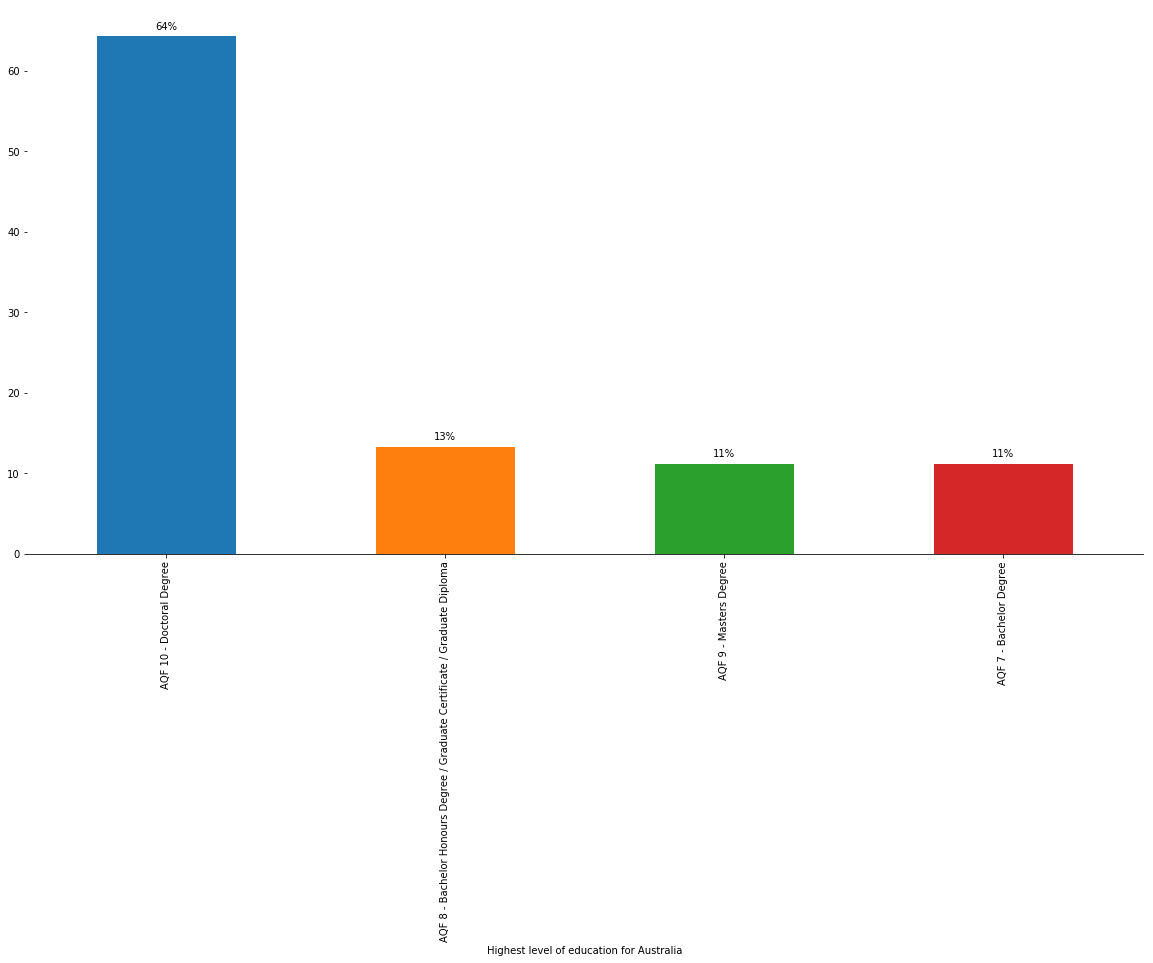

In [5]:
plot_cat_comparison(result, country, category)

## Germany

In [6]:
# Set up variables
country = 'Germany'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage,Difference with previous year
Highest level of education for Germany,,,
Master degree,169,50.903614,7.826691
Doctorate,133,40.060241,-8.247451
Undergraduate degree,19,5.722892,1.107507
"Final secondary-school examinations, general qualification for university entrance",7,2.108434,0.569972
Other,4,1.204819,-0.949027


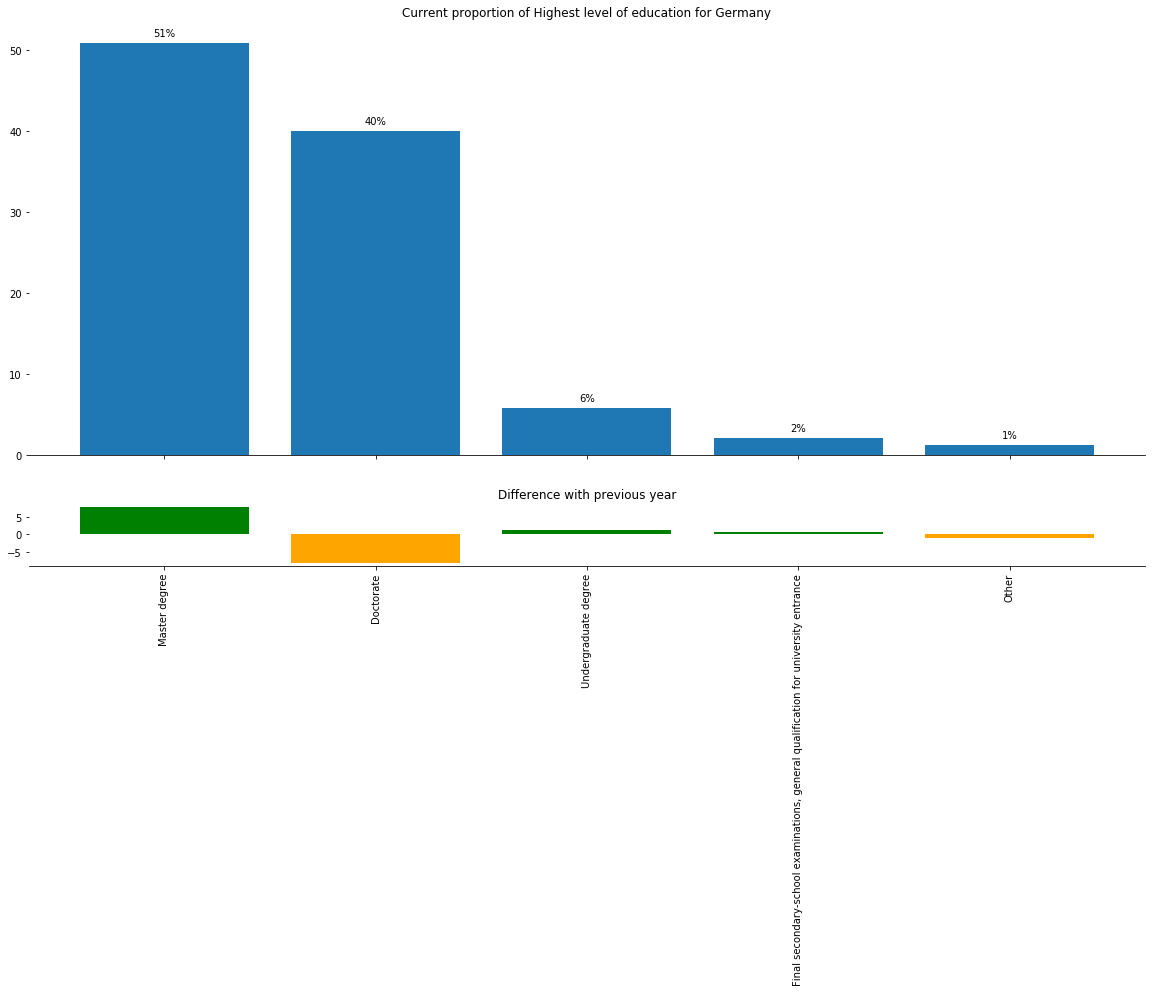

In [7]:
plot_cat_comparison(result, country, category)

## Netherlands

In [8]:
# Set up variables
country = 'Netherlands'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage,Difference with previous year
Highest level of education for Netherlands,,,
PhD,27,50.000000,-7.333333
WO (Wetenschappelijk onderwijs) Master,20,37.037037,1.037037
WO (Wetenschappelijk onderwijs) Bachelor,3,5.555556,2.888889
HBO (Hoger beroepsonderwijs) Master,3,5.555556,4.222222
HBO (Hoger beroepsonderwijs) Bachelor,1,1.851852,-0.814815


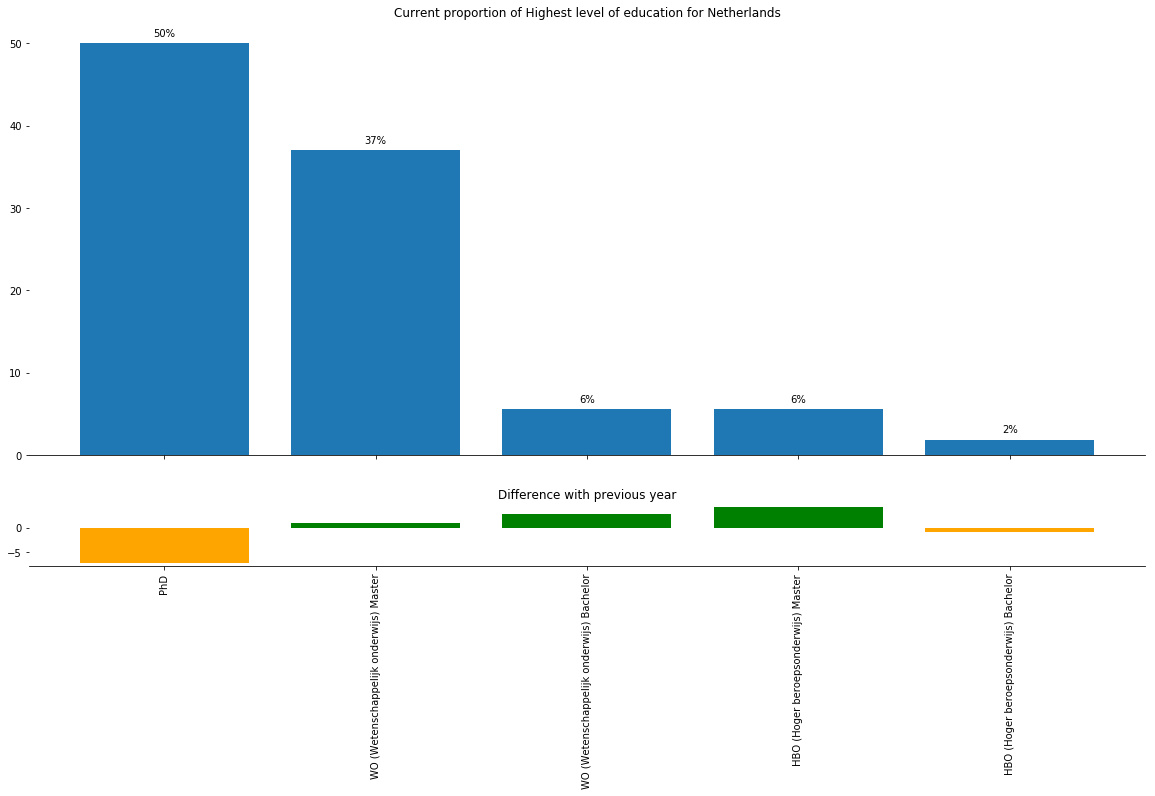

In [9]:
plot_cat_comparison(result, country, category)

## New Zealand

In [10]:
# Set up variables
country = 'New Zealand'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage
Highest level of education for New Zealand,,
Doctorate,14,37.837838
Undergraduate degree,10,27.027027
Master degree,10,27.027027
"Further Education (NVQ A-Level, ...)",2,5.405405
Other,1,2.702703


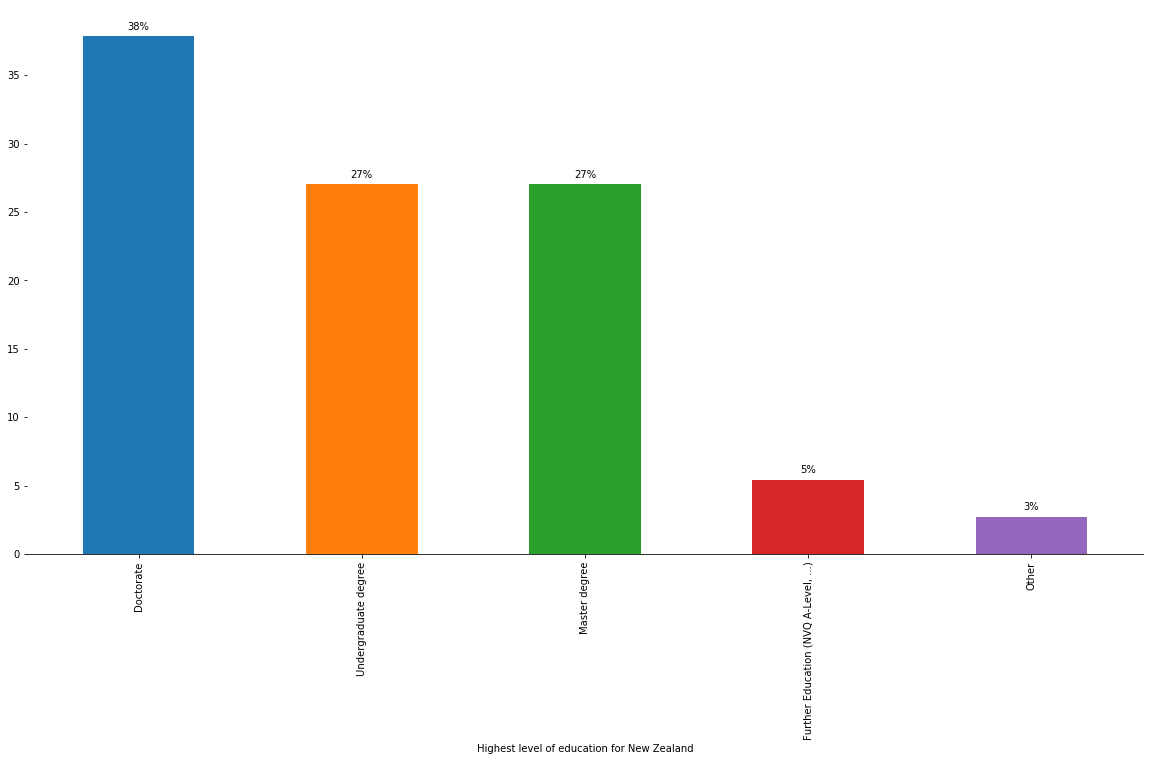

In [11]:
plot_cat_comparison(result, country, category)

## South Africa

In [12]:
# Set up variables
country = 'South Africa'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage,Difference with previous year
Highest level of education for South Africa,,,
Doctorate,7,30.434783,-43.249428
Undergraduate degree,6,26.086957,NaN
Master degree,6,26.086957,10.297483
Other,2,8.695652,NaN
"Further Education (NVQ A-Level, ...)",2,8.695652,NaN


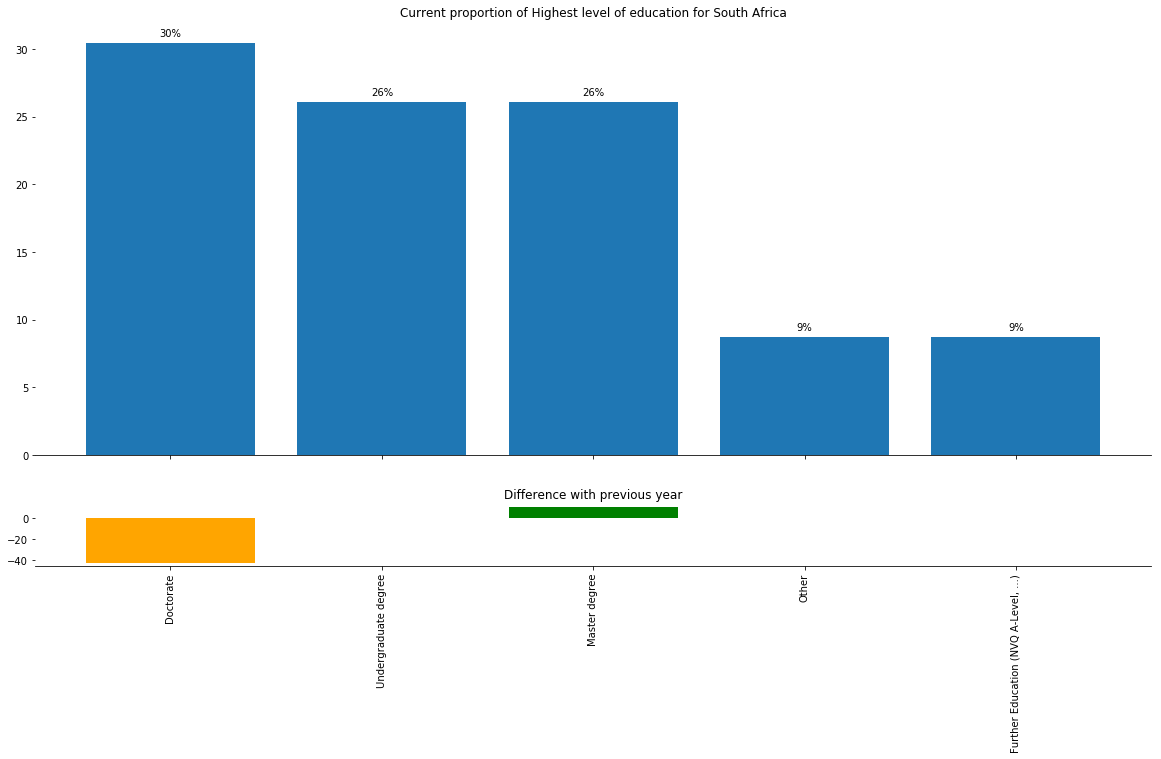

In [13]:
plot_cat_comparison(result, country, category)

## United Kingdom

In 2018, the proportion of participants that hold a PhD is 70%. This majority confirm the tendency from last year with an increase of 2%. 
Only 20% holds a Master degree as the highest education, and 8% an Undergraduate degree.

In [14]:
# Get the count for the 2017 year
country = 'United Kingdom'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage,Difference with previous year
Highest level of education for United Kingdom,,,
Doctorate,166,70.338983,2.452804
Master degree,48,20.338983,-2.018741
Undergraduate degree,21,8.898305,-0.451288
GSCEs,1,0.423729,NaN


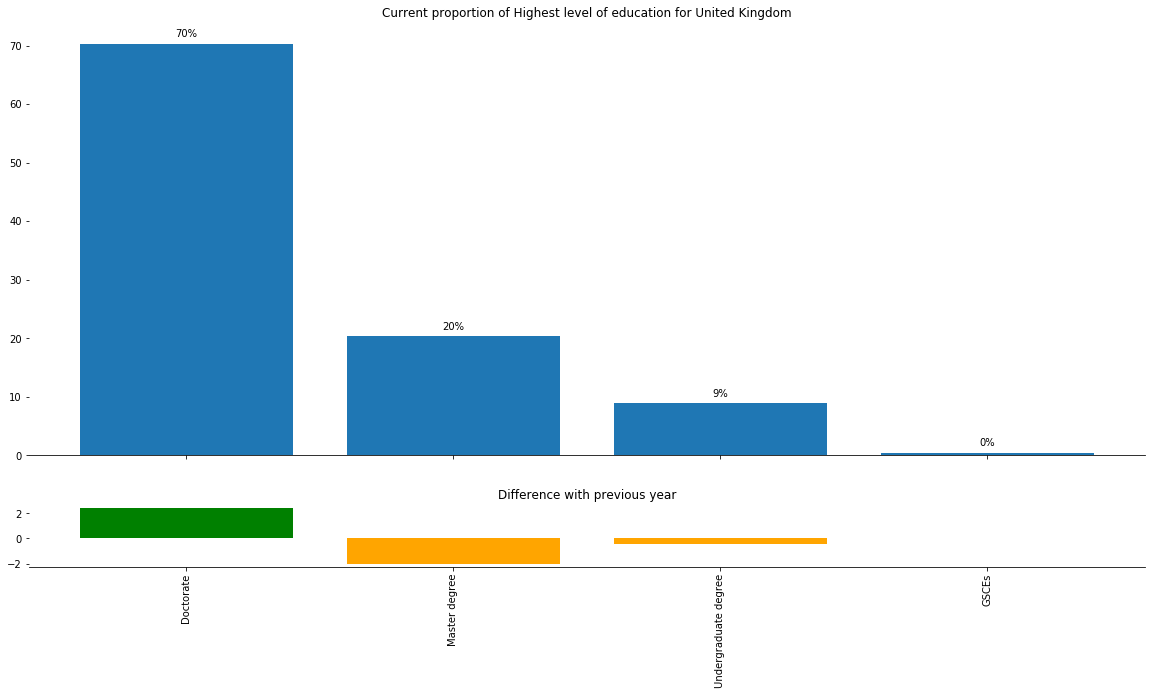

In [15]:
plot_cat_comparison(result, country, category)

## United States

In [16]:
# Set up variables
country = 'United States'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage,Difference with previous year
Highest level of education for United States,,,
Doctorate,67,45.578231,-14.544468
Master degree,46,31.292517,6.139143
Undergraduate degree,33,22.448980,10.792538
Other,1,0.680272,0.066775


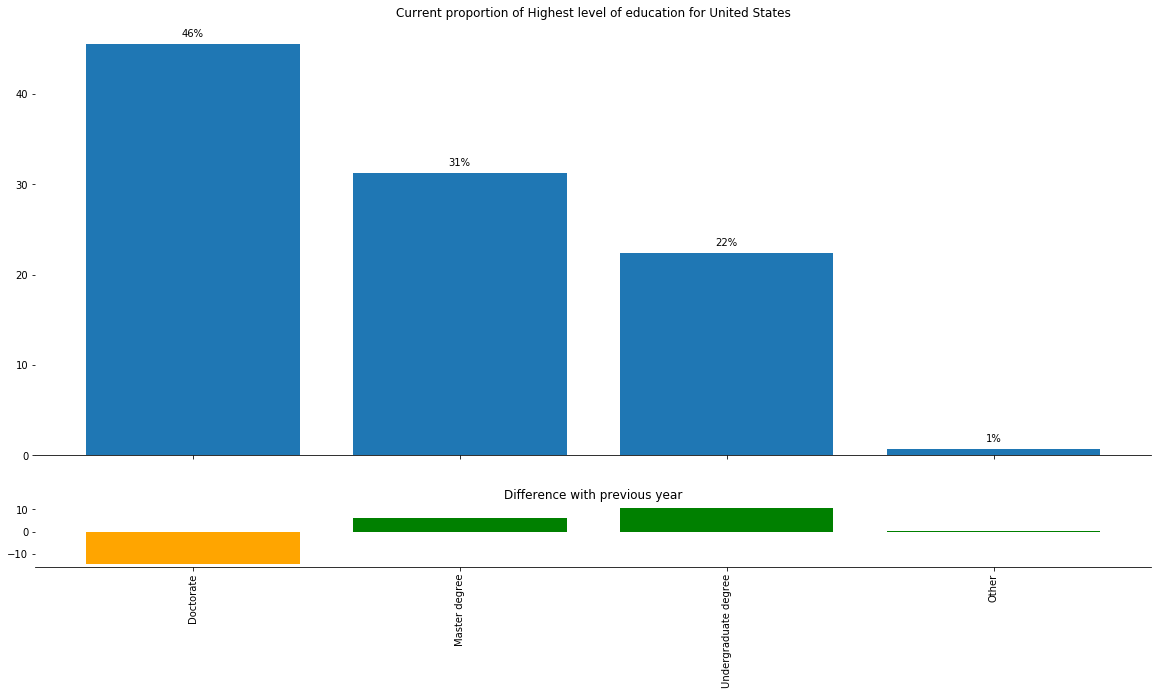

In [17]:
plot_cat_comparison(result, country, category)

## Rest of the World

For the rest of the world, the question is a `free text` type. Therefore, some cleaning are needed to render the results intelligible. 
After manually cleaning the data, it appears that a vast majority of participants hold a PhD (64%), while 14% have a Master degree and only 9% have an Undergraduate degree.

In [18]:
dict_values = {'phd': 'Doctorate', 
               'phd in progress': 'Doctorate',
               'mphil to phd transfer': 'Doctorate',
               'dr phil': 'Doctorate',
               'master of science': 'Master degree',
               'master': 'Master degree',
               'masters': 'Master degree',
               'master in science': 'Master degree',
               'postgraduate': 'Master degree',
               'msc': 'Master degree',
               'bachelors degree': 'Undergraduate degree',
               'bachelors  in computer science': 'Undergraduate degree',
               'bachelor': 'Undergraduate degree',
               'bachelors': 'Undergraduate degree',
               'nan': np.NaN
               }
df.loc[df['Country'] == 'World', education_column] = df.loc[df['Country'] == 'World', education_column].str.replace('.', '').str.replace("'", "").str.replace('degree', '').str.strip().str.lower()
df.loc[df['Country'] == 'World', education_column] = df.loc[df['Country'] == 'World', education_column].replace(dict_values)

In [19]:
# Set up variables
country = 'World'
category = 'Highest level of education'

# Get the count
result = count_diff(df, columns=education_column, category=category, country=country)

# Showing the results
result

,Count,Percentage
Highest level of education for World,,
Doctorate,35,64.814815
Master degree,14,25.925926
Undergraduate degree,5,9.259259


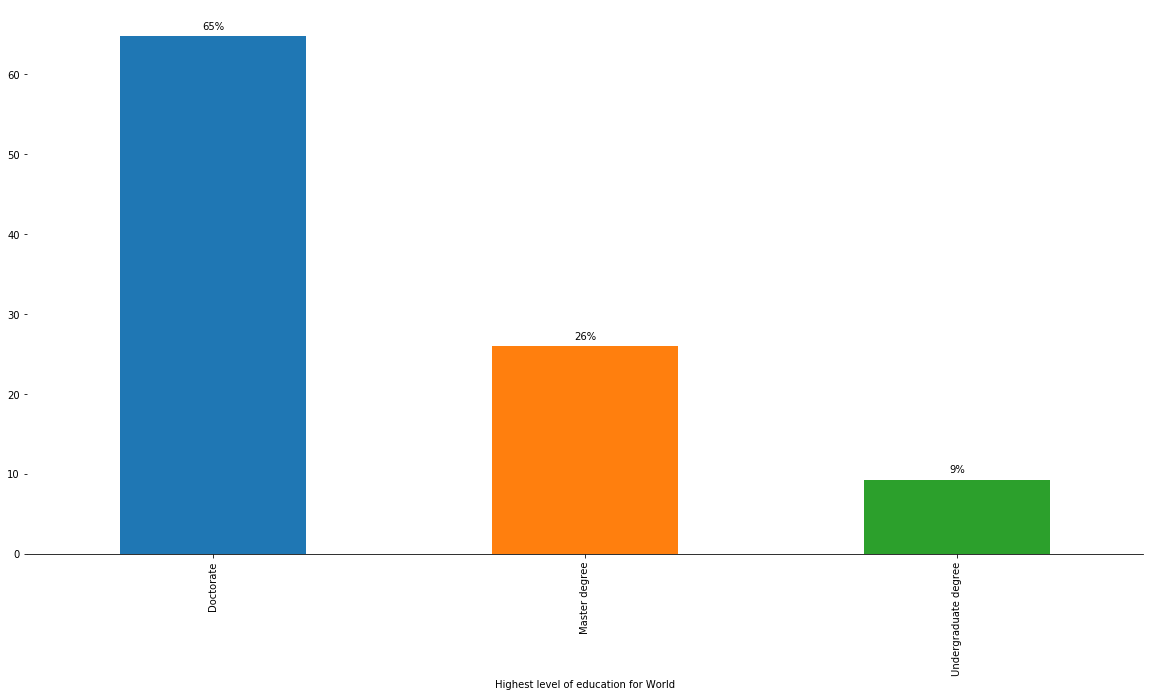

In [20]:
plot_cat_comparison(result, country, category)

## Comparison between countries

Even if the countries have different education levels, it is possible to match them on the common "Doctorate" and "Master degree". 
Therefore we compare them with these two equivalent levels and merge all others under the category "other".

In [21]:
# Create dictionary to replace values. These values may not be present in the current df but are present in the
# potential answers
dict_values = {'PhD': 'Doctorate', 
               'AQF 10 - Doctoral Degree': 'Doctorate',
               'HBO (Hoger beroepsonderwijs) Master': 'Master degree',
               'WO (Wetenschappelijk onderwijs) Master': 'Master degree',
               'AQF 9 - Masters Degree': 'Master degree'}
list_value_to_keep = ['Doctorate', 'Master degree', np.NaN]

# Replace the value in education
df['education comparison'] = df[education_column].replace(dict_values)

# Create a new columns if "World" if the country is not in the list
def merge_edu(x):
    if x in list_value_to_keep:
        return x
    elif x == np.NaN:
        return x
    else:
        return 'Other'
    
# Apply the function to a new columns
df['education comparison'] = df['education comparison'].apply(merge_edu)

# Count the values per countries
df_edu_comparison = df[['Country', 'education comparison']].groupby('Country')['education comparison'].value_counts().rename('Total count').reset_index()

# Add a percentage of each type of diploma per countries
df_edu_comparison['Percentage per countries'] = (df_edu_comparison['Total count'] / df_edu_comparison.groupby('Country')['Total count'].transform('sum')*100).round(2)

# Display the results
df_edu_comparison

,Country,education comparison,Total count,Percentage per countries
0,Australia,Doctorate,63,64.29
1,Australia,Other,24,24.49
2,Australia,Master degree,11,11.22
3,Germany,Master degree,309,47.03
4,Germany,Doctorate,290,44.14
5,Germany,Other,58,8.83
6,Netherlands,Doctorate,70,54.26
7,Netherlands,Master degree,51,39.53
8,Netherlands,Other,8,6.20
9,New Zealand,Doctorate,14,37.84


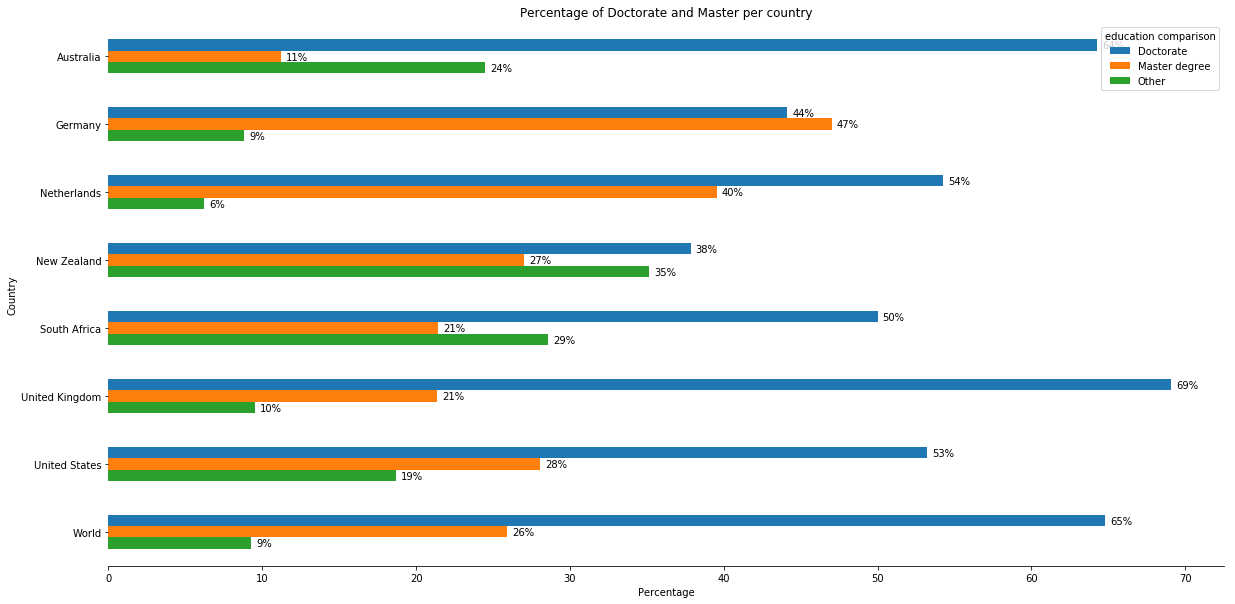

In [22]:
fig, ax = plt.subplots()
df_plot = df_edu_comparison.pivot(index='Country', 
                        columns='education comparison', 
                        values='Percentage per countries')
df_plot.plot(kind='barh',
                  title='Percentage of Doctorate and Master per country',
                  grid=False, ax=ax)

ax.set(xlabel="Percentage", ylabel="Country")

ax.invert_yaxis()  # when barh option, the bars are inverted 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) 
for p in ax.patches:
    if int(round(p.get_width())) > 0:
        ax.annotate('{}%'.format(str(int(round(p.get_width())))), 
                                 (p.get_x() + p.get_width(), p.get_y()), 
                                  xytext=(5, -9),
                                  textcoords='offset points')
plt.show();

# Academic field for education and professional development

Alongside of question about education level we also asked the participants in which field they finished their highest level of education. 
Here again the propositions were specific to each countries so the comparison is difficult despite lot of overlapping in the categories. 

In [23]:
# Create a column that merge all education columns
df_edu_field = df[['Year', 'Country']].copy()

# There are numbers in some of the fields, removing them as they are not needed
def remove_digit(s):
    try:
        return ''.join([i for i in s if not i.isdigit()])
    except TypeError:
        return s

df['Academic field'] = df['edu2. In which discipline is your highest academic qualification?'].apply(remove_digit)
columns = 'Academic field'

prof_qual = ['edu4. List any professional qualifications you hold (eg. P. Eng, PMP, …)?']

## Australia

In [24]:
# Set up variables
country = 'Australia'
category = 'Field of education'
result = count_diff(df, columns, country, category)

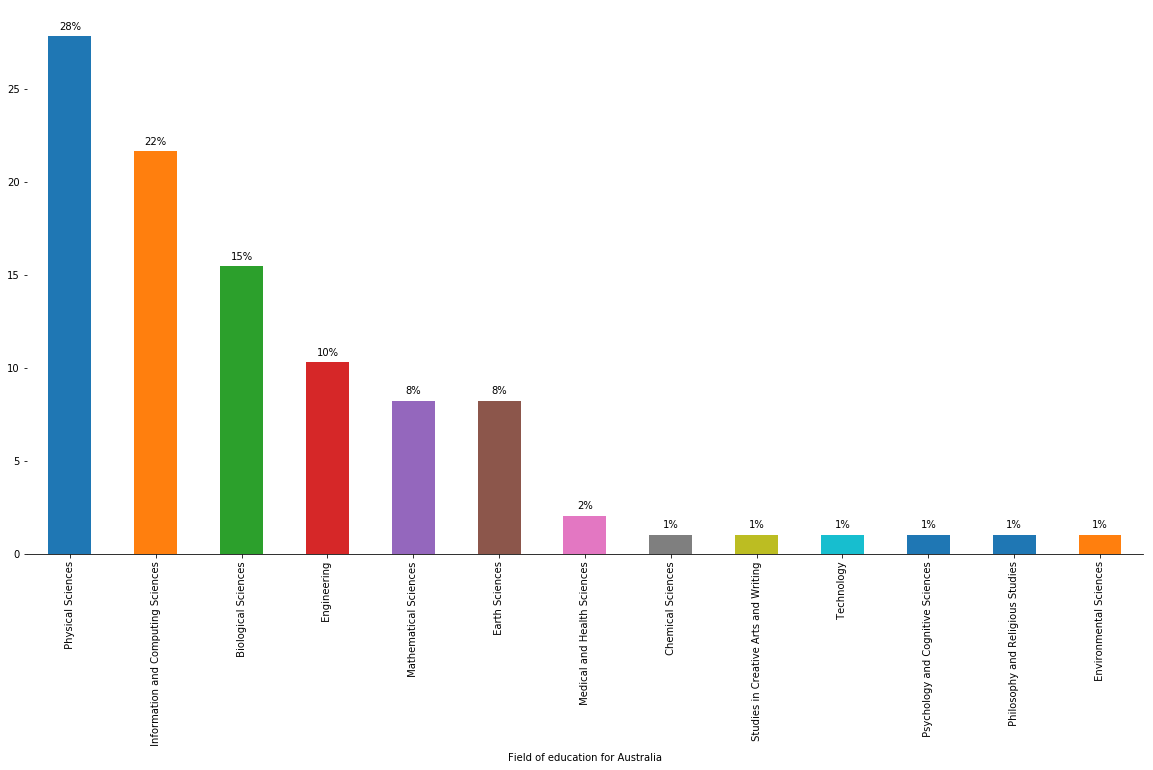

In [25]:
plot_cat_comparison(result, country, 'Field of education')

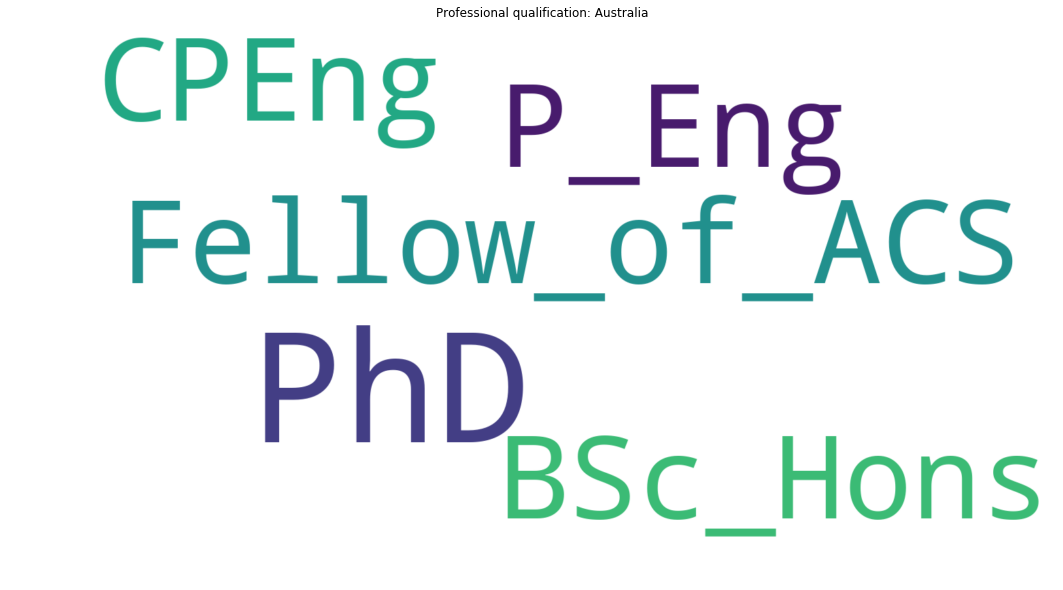

In [26]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Germany

In [27]:
# Set up variables
country = 'Germany'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for Germany,,,
Computer Science,85,25.835866,9.220482
Physics and Astronomy,75,22.796353,-2.742109
Geography & Environmental Sciences,25,7.598784,0.521861
Mathematics,24,7.294833,2.064064
Biological Sciences,24,7.294833,-4.089783
Electrical & Electronic Engineering,18,5.471125,3.009586
Mechanical Engineering,11,3.343465,1.805004
Geology,9,2.735562,0.889408
Materials Technology,6,1.823708,NaN


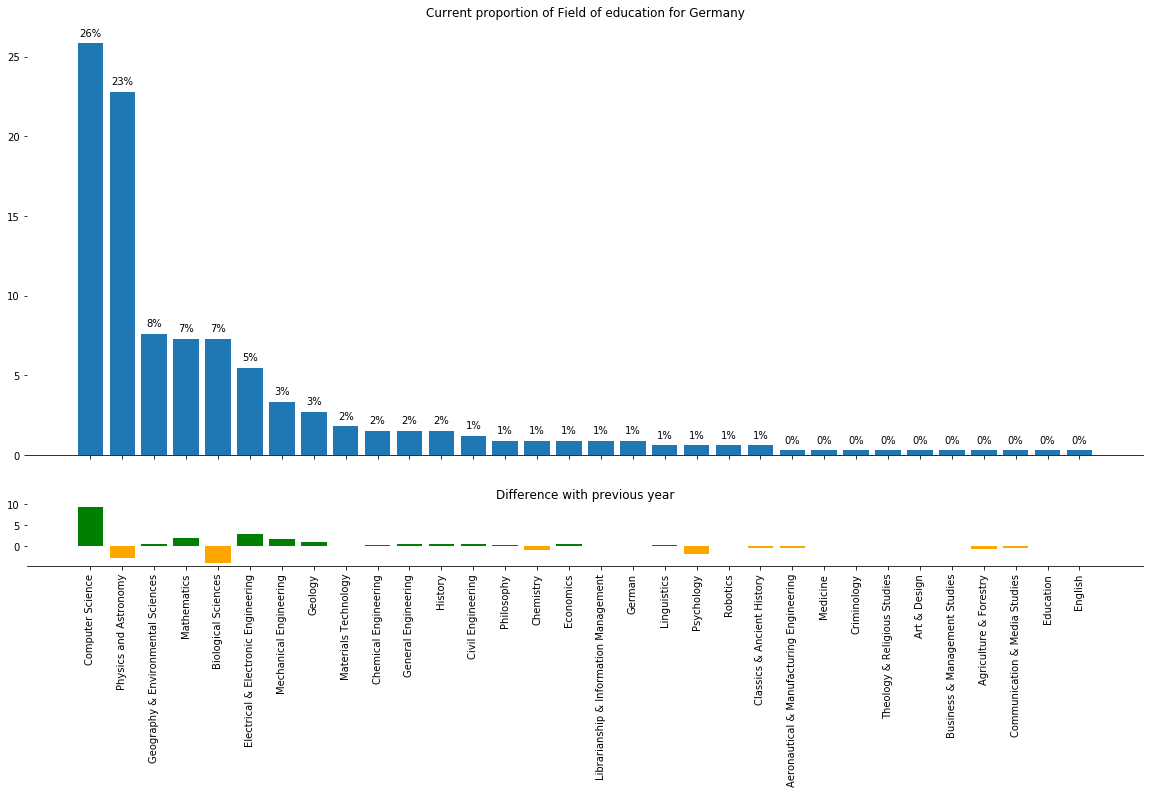

In [28]:
plot_cat_comparison(result, country, category)

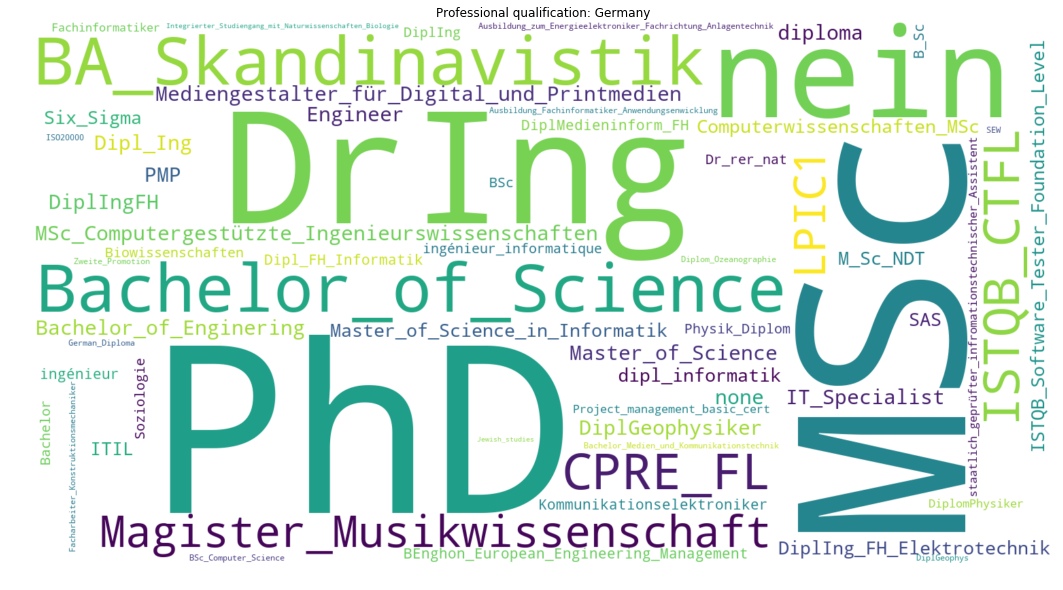

In [29]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Netherlands

In [30]:
# Set up variables
country = 'Netherlands'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for Netherlands,,,
Physics and Astronomy,18,33.333333,9.333333
Computer Science,11,20.370370,-6.296296
Biological Sciences,8,14.814815,2.814815
Chemistry,3,5.555556,-3.777778
Civil Engineering,2,3.703704,NaN
Geography & Environmental Sciences,2,3.703704,-1.629630
Electrical & Electronic Engineering,2,3.703704,2.370370
Chemical Engineering,1,1.851852,NaN
Communication & Media Studies,1,1.851852,-2.148148


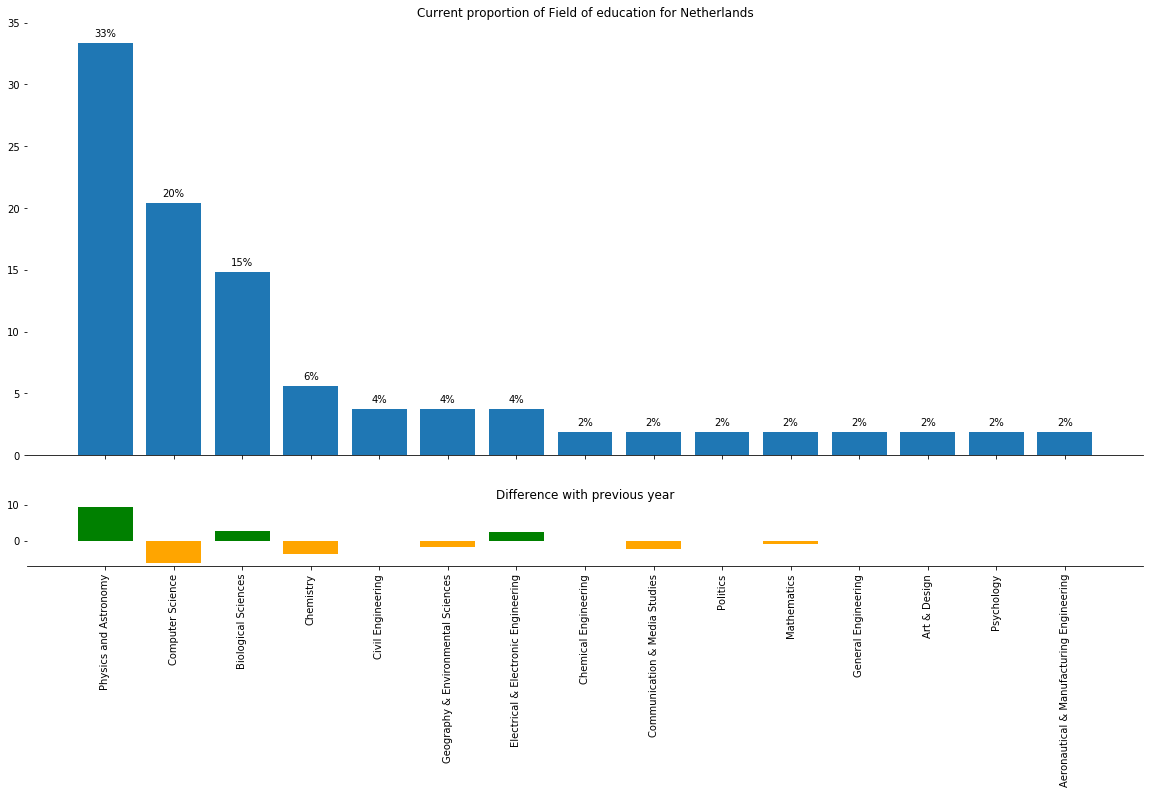

In [31]:
plot_cat_comparison(result, country, category)

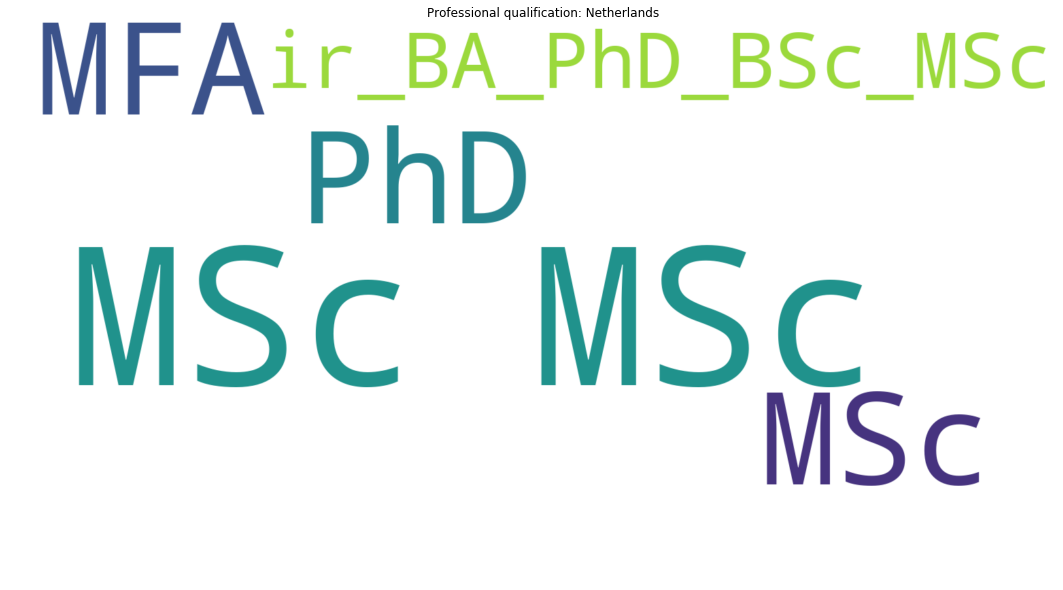

In [32]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## New Zealand

In [33]:
# Set up variables
country = 'New Zealand'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for New Zealand,,
Computer Science,11,29.729730
Biological Sciences,7,18.918919
Physics and Astronomy,4,10.810811
Mathematics,4,10.810811
Business & Management Studies,2,5.405405
Electrical & Electronic Engineering,2,5.405405
Mechanical Engineering,2,5.405405
Chemical Engineering,1,2.702703
Chemistry,1,2.702703


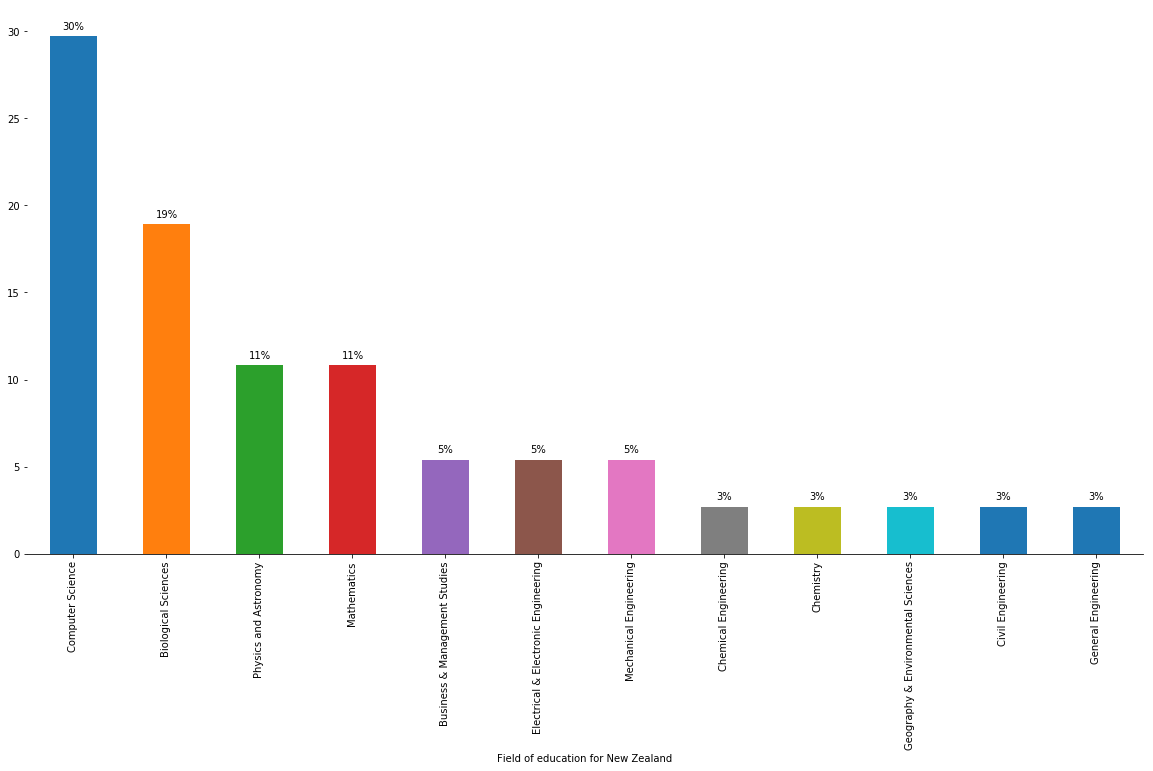

In [34]:
plot_cat_comparison(result, country, category)

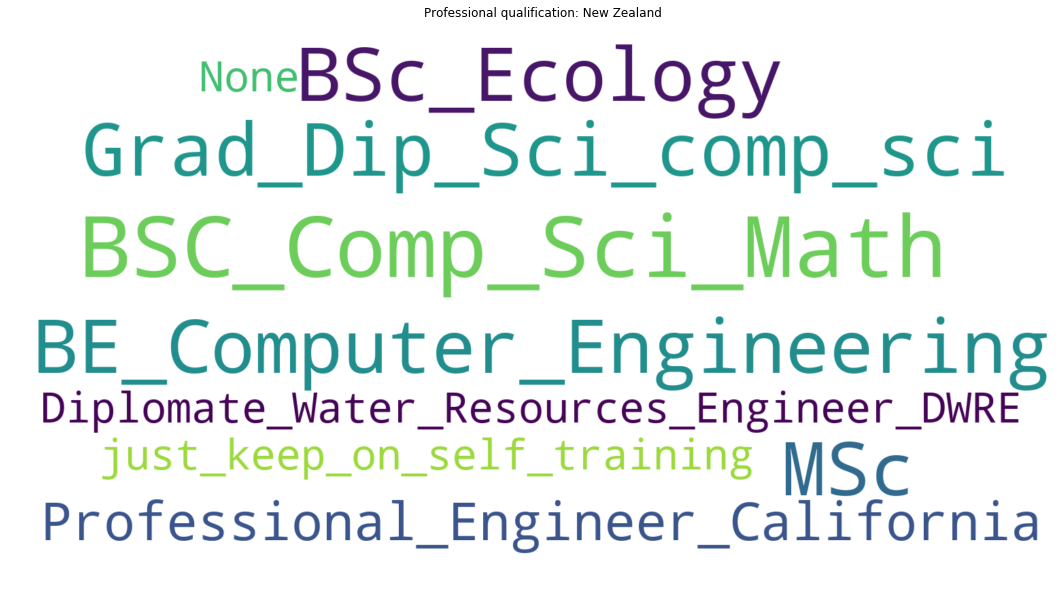

In [35]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## South Africa

In [36]:
# Set up variables
country = 'South Africa'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for South Africa,,,
Computer Science,10,45.454545,40.191388
Biological Sciences,4,18.181818,NaN
Mathematics,3,13.636364,NaN
Communication & Media Studies,1,4.545455,NaN
Physics and Astronomy,1,4.545455,-58.612440
Economics,1,4.545455,-0.717703
Business & Management Studies,1,4.545455,NaN
Psychology,1,4.545455,NaN


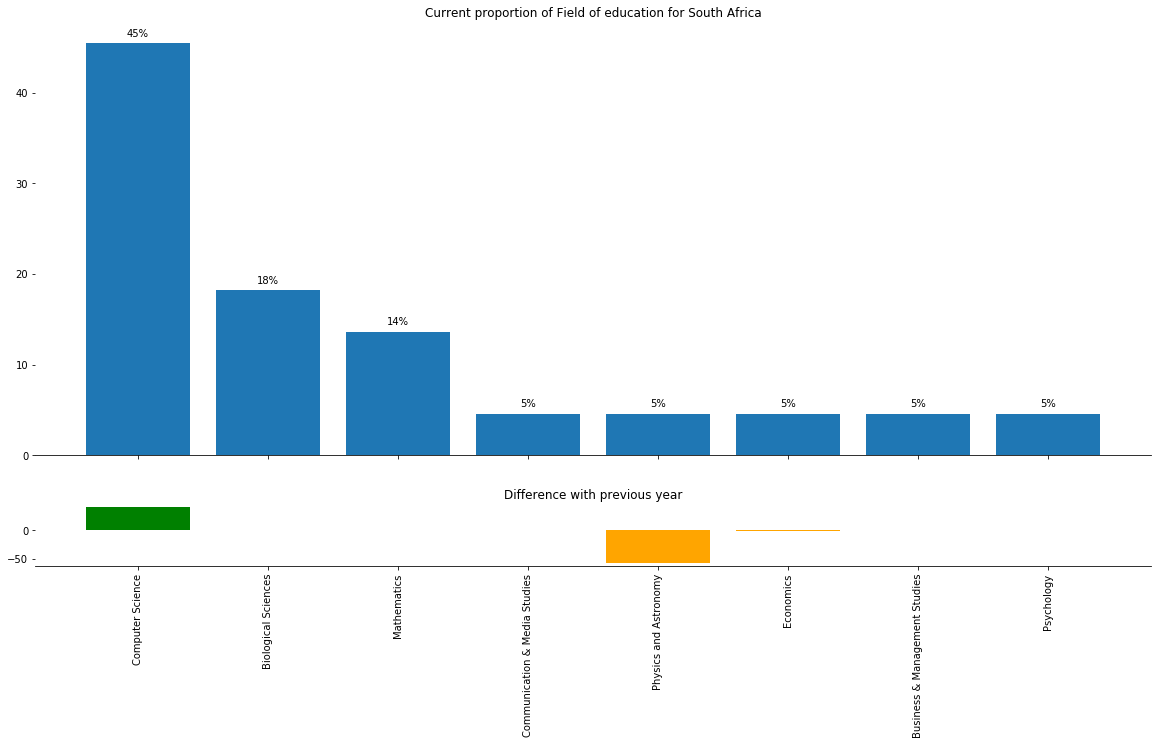

In [37]:
plot_cat_comparison(result, country, category)

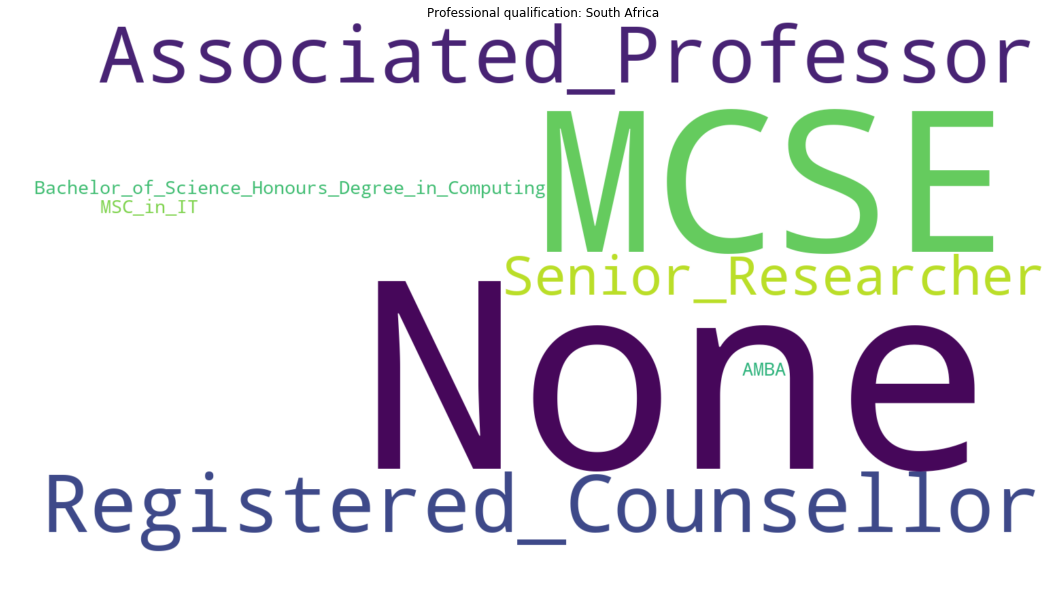

In [38]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## United Kingdom

In [39]:
# Set up variables
country = 'United Kingdom'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for United Kingdom,,,
Physics and Astronomy,81,34.468085,6.304820
Computer Science,56,23.829787,-3.108988
Biological Sciences,28,11.914894,5.792445
Mathematics,18,7.659574,-0.095528
Chemistry,12,5.106383,-1.424229
Geography & Environmental Sciences,11,4.680851,0.599218
Electrical & Electronic Engineering,6,2.553191,-0.712115
Geology,4,1.702128,0.477638
General Engineering,4,1.702128,0.477638


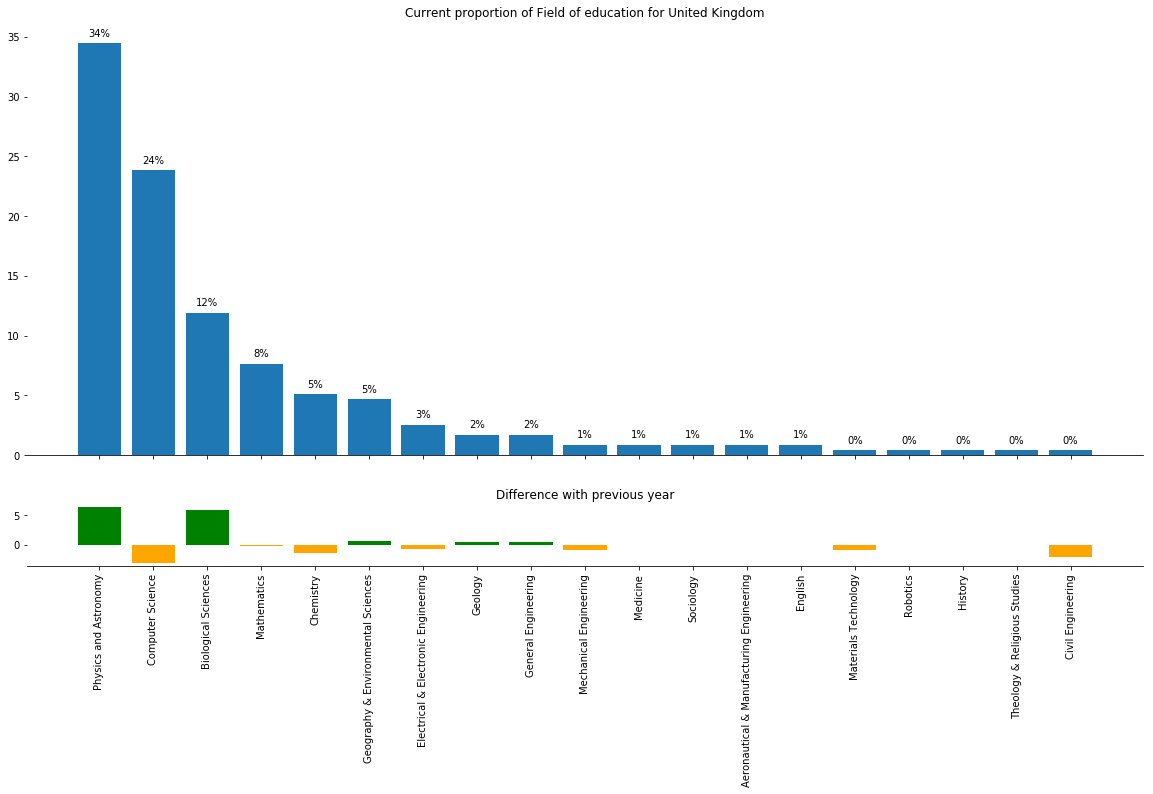

In [40]:
plot_cat_comparison(result, country, category)

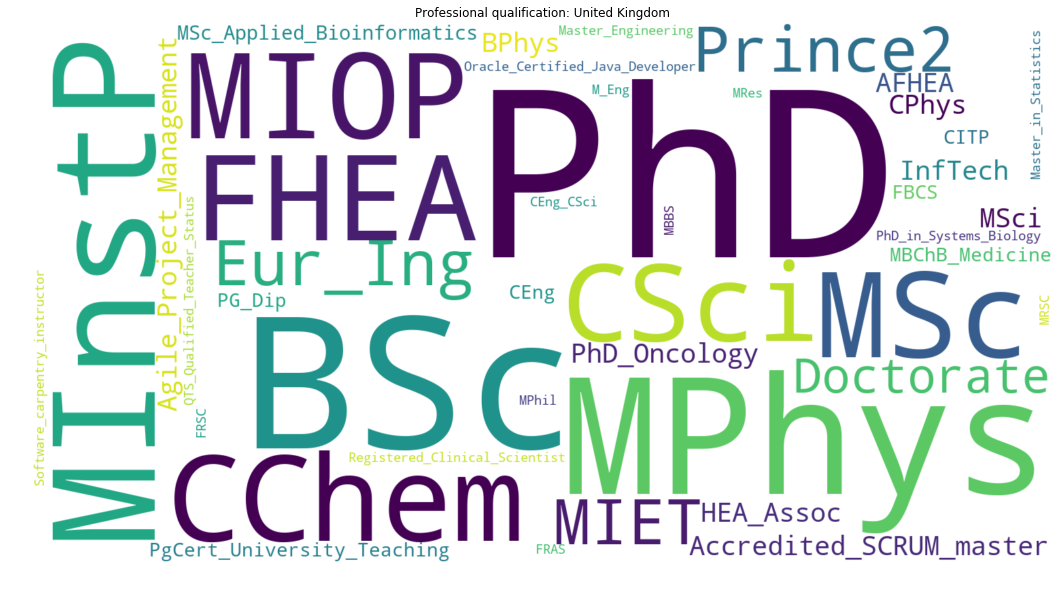

In [41]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## United States

In [42]:
# Set up variables
country = 'United States'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage,Difference with previous year
Field of education for United States,,,
Physics and Astronomy,44,30.344828,16.234398
Computer Science,38,26.206897,1.053522
Biological Sciences,14,9.655172,-5.068754
Mathematics,13,8.965517,3.444045
Electrical & Electronic Engineering,6,4.137931,1.070446
Geography & Environmental Sciences,4,2.758621,2.145124
Chemical Engineering,2,1.379310,-0.461180
Philosophy,2,1.379310,NaN
Geology,2,1.379310,-1.074677


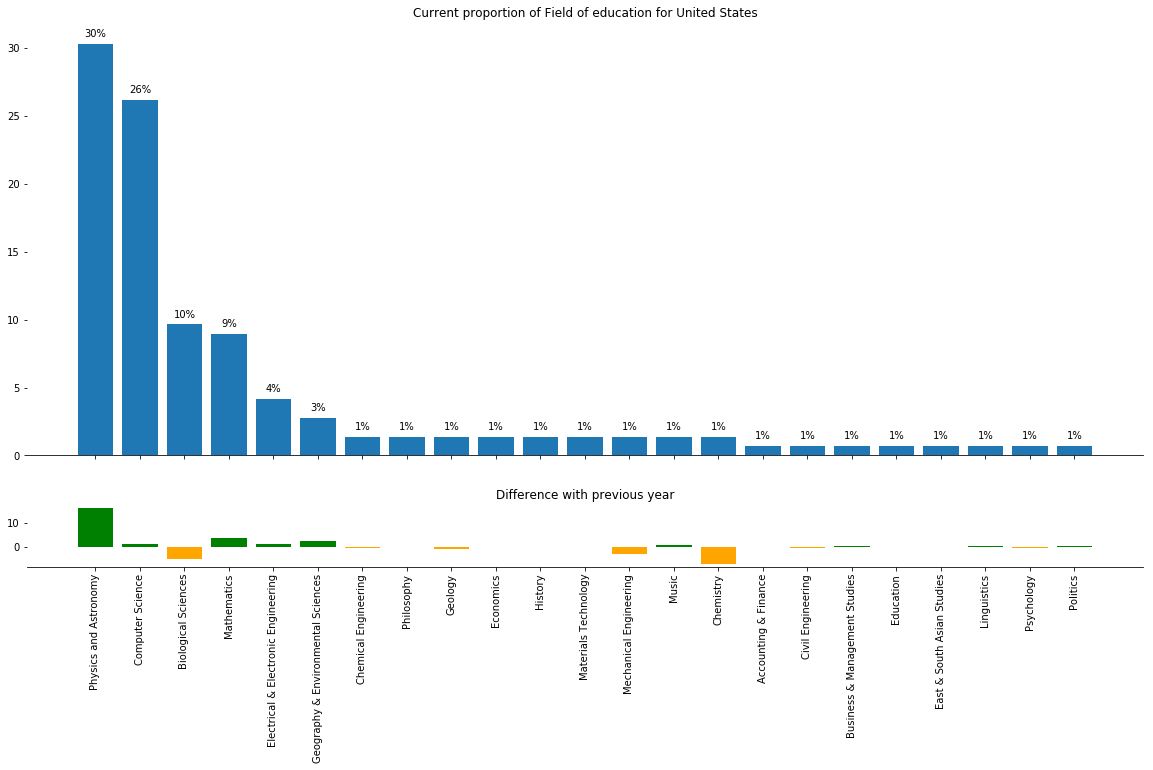

In [43]:
plot_cat_comparison(result, country, category)

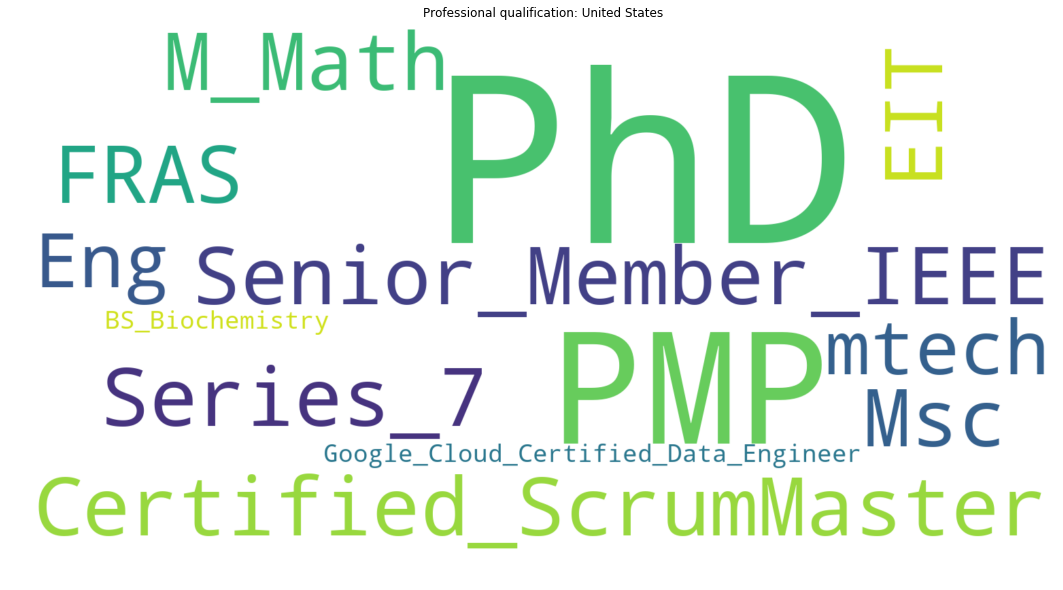

In [44]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Rest of the world

In [45]:
# Set up variables
country = 'World'
category = 'Field of education'
result = count_diff(df, columns, country, category)
result

,Count,Percentage
Field of education for World,,
Physics and Astronomy,10,18.518519
Biological Sciences,10,18.518519
Computer Science,9,16.666667
Mathematics,6,11.111111
Geography & Environmental Sciences,3,5.555556
Education,2,3.703704
Psychology,2,3.703704
Electrical & Electronic Engineering,2,3.703704
Accounting & Finance,1,1.851852


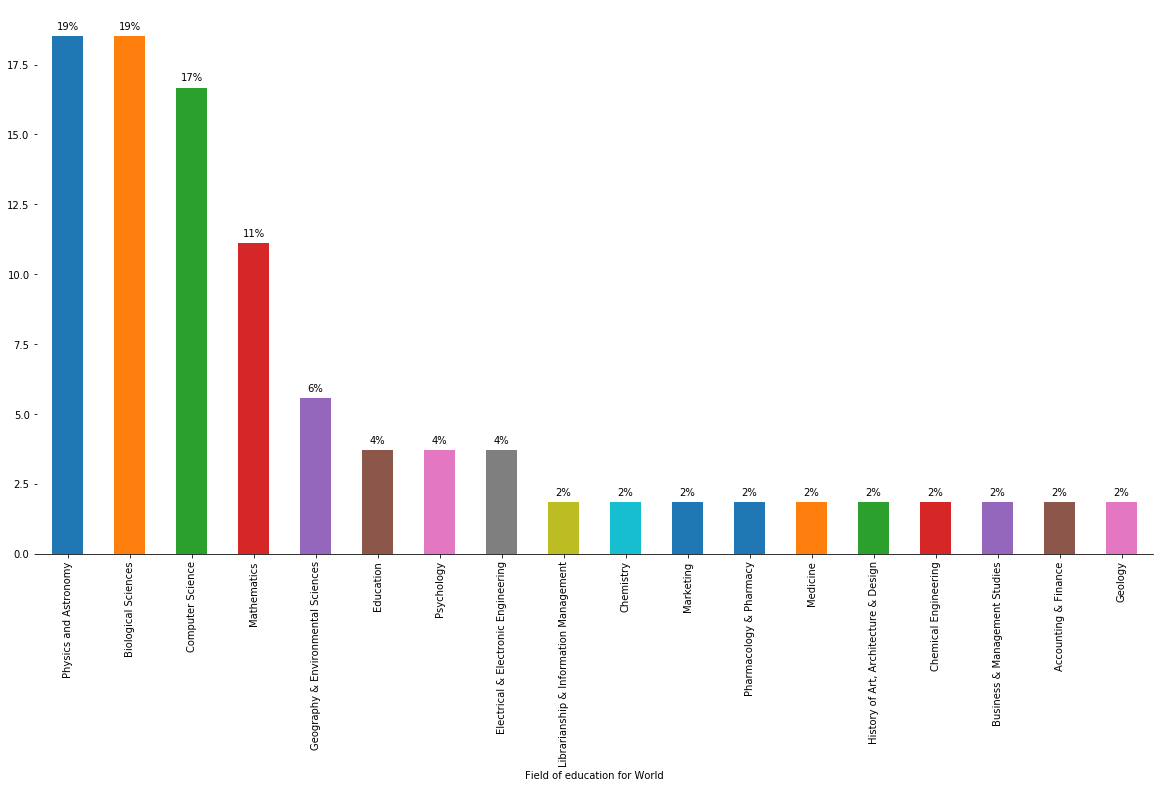

In [46]:
plot_cat_comparison(result, country, category)

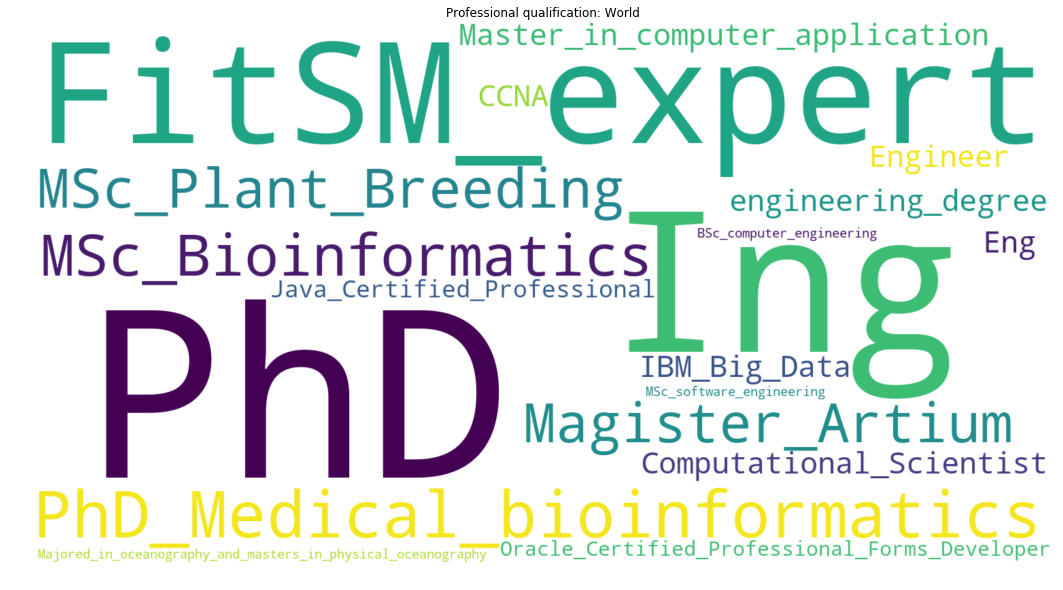

In [47]:
plot_wordcloud(df, country=country, category='Professional qualification', columns=prof_qual)

## Comparison between countries

In [48]:
# Count the values per countries
#df_edu_comparison = df_edu_field.groupby('Country')['Academic field'].value_counts().rename('Total count').reset_index()

# Add a percentage of each type of diploma per countries
#df_edu_comparison['Percentage per countries'] = (df_edu_comparison['Total count'] / df_edu_comparison.groupby('Country')['Total count'].transform('sum')*100)

# Display the results
#df_edu_comparison

In [49]:
#fig, ax = plt.subplots()
#df_plot = df_edu_comparison.pivot(index='Country', 
#                        columns='Academic field', 
#                        values='Percentage per countries')

#df_plot.plot(kind='barh',
#                  title='Percentage of academic field per country',
#                  grid=False, ax=ax, stacked=True)

#ax.set(xlabel="Country", ylabel="Percentage")

#ax.invert_yaxis()  # when barh option, the bars are inverted 
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False) 
# Put a legend below current axis
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
#          fancybox=True, shadow=True, ncol=5)
#for p in ax.patches:
#    if int(round(p.get_width())) >= 5:
#        ax.annotate('{}%'.format(str(int(round(p.get_width())))), 
#                    (p.get_x() + int(p.get_width())/2., p.get_y()+ int(p.get_height())/2.),
#                    ha='center')

#plt.show();